## Trabalho sobre correlação e regressão


# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [1]:
# !pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### dataset

In [3]:
dados = pd.read_csv("dados_projeto.csv", sep = ';')

###  DataFrame

In [4]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [5]:
dados.shape

(365, 2)

### estatísticas descritivas dos dados

In [6]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### box plot para cada variável do dataset

<AxesSubplot:title={'center':'Box plot'}, xlabel='Consumo em Litros'>

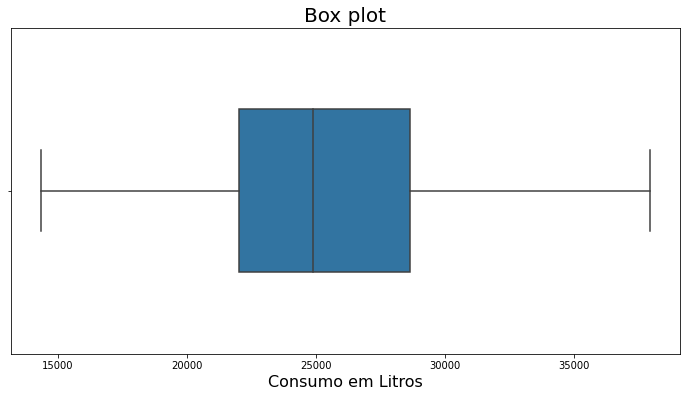

In [7]:
ax = sns.boxplot(data=dados, x ='Y', orient= 'h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Consumo em Litros', fontsize=16)
ax

<AxesSubplot:title={'center':'Box plot'}, xlabel='Temperatura'>

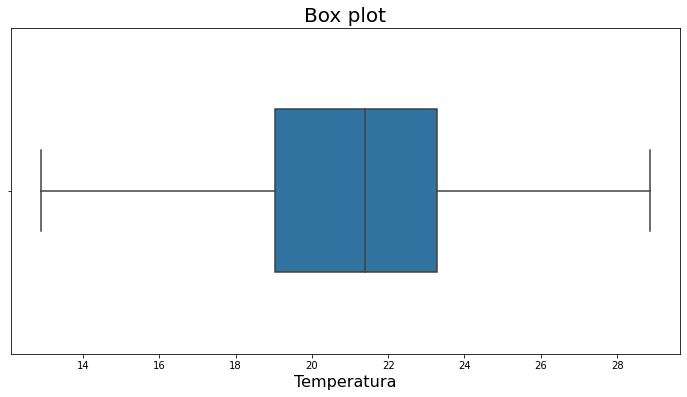

In [8]:
ax = sns.boxplot(data=dados, x ='X', orient= 'h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Temperatura', fontsize=16)
ax

### relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

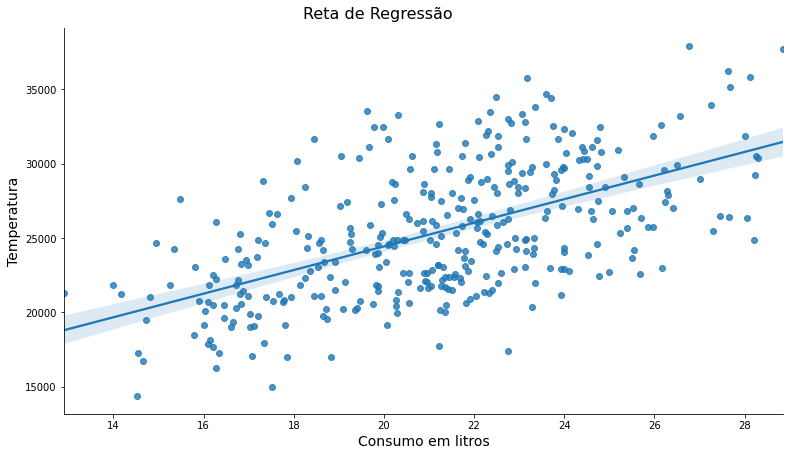

In [9]:
ax = sns.lmplot(x='X',y='Y',data =dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão', fontsize=16, y=1.02)
ax.set_xlabels("Consumo em litros", fontsize=14)
ax.set_ylabels("Temperatura", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [10]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: SIM de 0.57

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Preparando os dados para estimar um modelo de regressão linear simples

In [11]:
Y= dados.Y
X=sm.add_constant(dados.X)

### Estimando o modelo de regressão linear simples

In [12]:
resultado_regressao = sm.OLS(Y,X).fit()

### Visualizando o resultado da regressão

In [13]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.87e-33
Time:                        09:26:07   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtendo o $Y$ previsto

In [14]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [15]:
resultado_regressao.predict([1,42])[0]

41913.973838166254

### Obtendo os resíduos da regressão

In [16]:
dados['Residuos'] = resultado_regressao.resid
dados.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plot um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<AxesSubplot:xlabel='X', ylabel='Resíduos'>

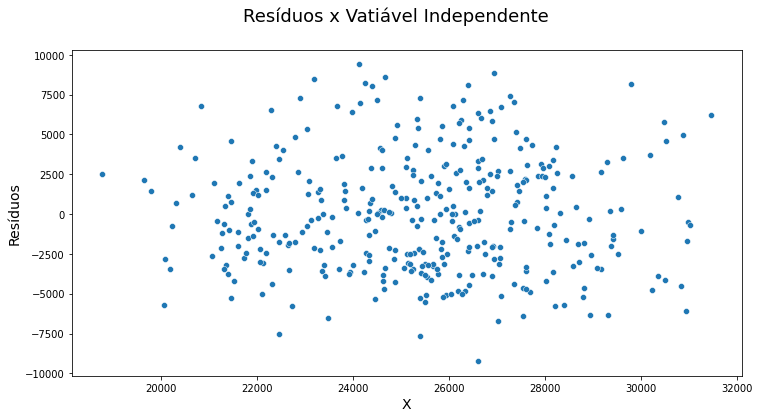

In [17]:
ax = sns.scatterplot(x=dados.Y_previsto, y=dados.Residuos)
ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Resíduos x Vatiável Independente', fontsize = 18)
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Resíduos", fontsize=14)
ax

### Obtendo o QQPlot dos resíduos

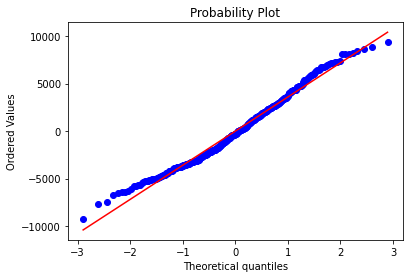

In [18]:
(_, (_, _, _)) = probplot(dados.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtendo o R² da regressão pelo método da soma dos quadrados

In [19]:
resultado_regressao.rsquared

0.3301820493324321